In [44]:
import config
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [12]:
rc = pd.read_csv('data/RC.csv')

In [41]:
rc.describe()

,Date,Cost Index,Year Composite
count,129.000000,129.000000,129.000000
mean,1954.000000,65.515839,308.655323
std,37.383151,19.288464,568.733520
min,1890.000000,32.805185,4.233333
25%,1922.000000,49.420634,9.235000
50%,1954.000000,64.044606,29.689167
75%,1986.000000,82.794848,236.358333
max,2018.000000,100.568840,2744.680000


In [45]:
scaler=MinMaxScaler()
#fit scaler
scaler.fit(rc[['Cost Index', 'Year Composite']])
#transformed scaled data
rc_scaled=scaler.transform(rc[['Cost Index', 'Year Composite']])

#rever to dataframe
rc_scaled = pd.DataFrame(rc_scaled, columns=['Cost Index', 'Year Composite'])
rc_scaled['Date']=rc.Date
rc_scaled.head()

,Cost Index,Year Composite,Date
0,0.861429,1.000000,2018
1,0.846391,0.891820,2017
2,0.836152,0.761778,2016
3,0.824170,0.750595,2015
4,0.791969,0.702964,2014


## DTW

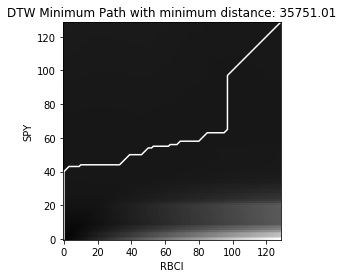

In [70]:
!pip install dtw
from dtw import dtw,accelerated_dtw

d1 = df['Cost Index'].interpolate().values
d2 = df['Year Composite'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('RBCI')
plt.ylabel('SPY')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

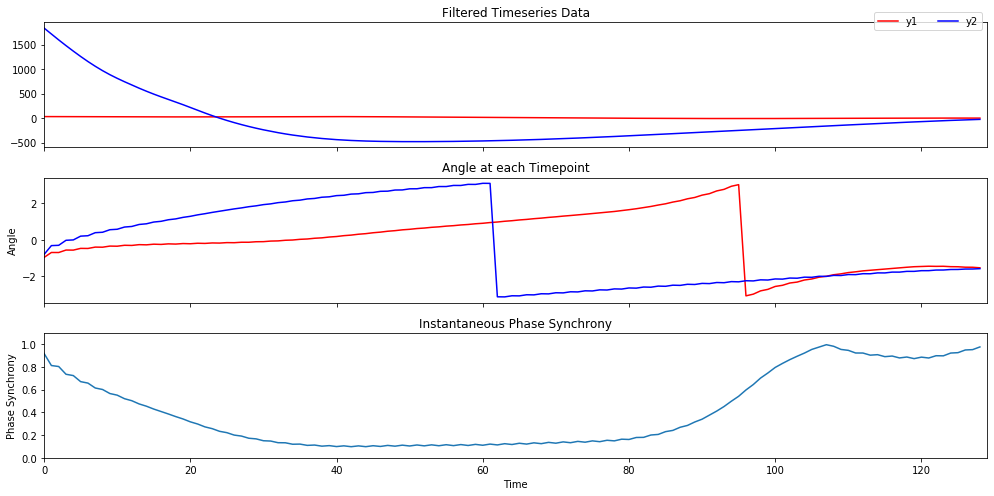

In [72]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = df['Cost Index'].interpolate().values
d2 = df['Year Composite'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()